<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/NLP/Text_classification__sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

Base_path = r"/content/drive/MyDrive/Colab/NLP/Text_classification_all_network"

os.chdir(Base_path)
!pwd

/content/drive/MyDrive/Colab/NLP/Text_classification_all_network


#### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
dataset="Data/IMDB Dataset.csv"

In [ ]:
df=pd.read_csv(dataset)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#### equal value count for sentiments

In [ ]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

s = "A wonderful little production. <br /><br />"
strip_html(s)

'A wonderful little production. '

In [ ]:
import re
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

s = "A wonderful little production.[1]"
remove_between_square_brackets(s)

'A wonderful little production.'

In [ ]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
df['review']=df['review'].apply(denoise_text)

In [ ]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

s = "A wonderful little production. @ #saveNation"
remove_special_characters(s)

'A wonderful little production  saveNation'

In [ ]:
def Convert_to_bin(text, remove_digits=True):
    return 1 if text=='positive' else 0

In [ ]:
df['review']=df['review'].apply(remove_special_characters)

In [ ]:
df['sentiment']=df['sentiment'].apply(Convert_to_bin)

In [ ]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1
5,Probably my alltime favorite movie a story of ...,1
6,I sure would like to see a resurrection of a u...,1
7,This show was an amazing fresh innovative ide...,0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df['review'].values

In [ ]:
Y=df['sentiment'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


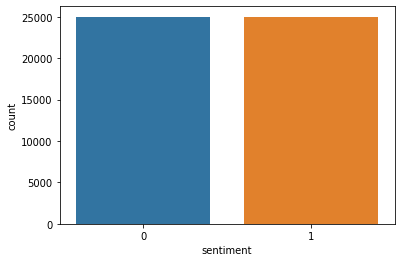

In [ ]:
import seaborn as sns
sns.countplot(df['sentiment'])

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

## Artificial Neural Networks Application

## Vectorizers :Bag of words

### **Vectorizers**: 
In this method, we create a single feature vector using all the words in the vocubulary. Each word is basically  reagrded as a feature. So, the number of features is equal to the number of unique words in the vocab. Now, each sentence or review is a sample or record. Now, if the word is present in that sample it has some values and if the word is not present it is zero. Also called **bag of words model**

So, each sample has the same feature set size which is equal to the size of the vocabulary. Now, the vocabuary is basically made of the words in the train set. All the samples of the train and test set is fit using this vocabulary only. So, there may be some words in the test samples which are not present in the vocabulary, they are ignored. 

Now, they form very sparse matrices or feature sets. Now, similar to a normal classification problem, the words become features of the record and the corresponding tag becomes the target value. So, it is actually like a common classification problem with number of features being equal to the distinct tokens in the training set.

This can be done in two ways:

1. **Count Vectorizer**: Here the count of a word in a particular sample or review. The count of that word becomes the value of the corresponding word feature. If a word in the vocab does not appear in the sample its value is 0. 

2. **TF-IDF Vectorizer**: It is a better approach. It calculates two things term frequency and inverse document frequency. Term frequency= No. of times the word appears in the sample. 

`IDF = log ( number of time the word appears in the sample / number of time the word appears in the whole document)` 

This helps to note some differences like the word "The" appears with same freq in almost all sentences while special words carrying significance like "good" don't. So, these TF and IDF terms are multiplied to obtain the vector formats for each sample. 

It can also be done by ***TensorFlows Tokenizer***.
 
For creating the matrix here, we need to use a tensorflow tokenizer, tokenizes the text to tokens. It can be done in mainly three ways:
1. **Binary:** `X = tokenizer.sequences_to_matrix(x, mode='binary')` 
- In this case, the value of a word feature is 1 if the word is present in the sample else zero.

2. **Count:** `X = tokenizer.sequences_to_matrix(x, mode='count')` 
- In this case, it is the number of times a word appear in the sentence.

3. **TF-IDF:** `X  = tokenizer.sequences_to_matrix(x, mode='tfidf')`
- In this we consider the TF of the word in the sample and IDF of the word in the sample with resect to the occurence of the word in the whole document.  

#### Count Vectorizers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()

In [ ]:
vec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
x_train = vec.transform(X_train)

In [ ]:
x_test = vec.transform(X_test)

In [ ]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:

model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                2817952   
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 2,818,241
Trainable params: 2,818,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, Y_train,epochs=10, verbose=True, batch_size=16 )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


2188/2188 [==============================] - 10s 4ms/step - loss: 0.3132 - accuracy: 0.8764
Epoch 2/10
2188/2188 [==============================] - 10s 4ms/step - loss: 0.1119 - accuracy: 0.9591
Epoch 3/10
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0459 - accuracy: 0.9840
Epoch 4/10
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 5/10
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 6/10
2188/2188 [==============================] - 10s 4ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 7/10
2188/2188 [==============================] - 10s 4ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 8/10
2188/2188 [==============================] - 10s 4ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 9/10
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 10/10
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0061

## Model Training Done

In [ ]:
model.evaluate(x_train,Y_train)

1094/1094 [==============================] - 3s 3ms/step - loss: 7.7954e-04 - accuracy: 0.9998


[0.0007795396959409118, 0.999828577041626]

### Training Score is 100% with CountVectorizer and ANN model

In [ ]:
model.evaluate(x_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 0.8238 - accuracy: 0.8752


[0.8237789869308472, 0.8751999735832214]

### Test score 87%

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfvec = TfidfVectorizer()

In [ ]:
tfvec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
x_train = tfvec.transform(X_train)

In [ ]:
x_test = tfvec.transform(X_test)

In [ ]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score_train = lr.score(x_train, Y_train)
print("Training score : ",score_train)

Training score :  0.9342


### Training Score is 93% with TfidfVectorizer and LogisticRegression Model

In [ ]:
score_test = lr.score(x_test, Y_test)
print("Test score : ",score_test)

Test score :  0.8882


### Test Score is 100% with TfidfVectorizer and LogisticRegression Model

## Word Embedding : Time series model

**Word Embedding**:

 In this method, the words are individually represented as a vector. In case of the bag of words all of the words made up a vector. Here, there are 100 words in a vocabulary, so, a specific word will be represented by a vector of size 100 where the index corresponding to that word will be equal to 1, and others will be 0. 

So, Each sample having different number of words will basically have a different number of vectors, as each word is equal to a vector. Now, to feed a model we will need to have the same dimension for each sample, and as a result padding is needed to make the number of words in each sample equal to each other.  

Basically in the bag of words or vectorizer approach, if we have 100 words in our total vocabulary, and a sample with 10 words and a sample with 15 words, after vectorization both the sample sizes would be an array of 100 words, but here for the 10 words it will be a (10 x 100) i,e 100 length vector for each of the 10 words and similarly for 15th one size will be (15 x 100). So, we need to find the longest sample and pad all others up to match the size.

We can do this in some ways:

**One-Hot encoding:** It is just taking the size of the vocabulary and making an array of that size with 0's at all indices and 1 at only the index of the word. But this things provides us with a very less information.

The Second Choice is **word embeddings**.

The one hot encoder is a pretty hard coded approach. It is of a very high dimension and sparse with a very low amount of data. **Embedding is a way to create a dense vector representation out of the sparse representations.** It is of a lower dimension and helps to capture much more informations. It more like captures the relation and similarities between words using how they appear close to each other. For example, king, queen, men and women will have some relations. 

Say, we are having 10k words are being embedded in a 300 dimensional embedding space. To do this, we declare the number of nodes in the embedding layer =300. Now, each word of the 10k words enter the embedding layer as a 10k sized individual vector, Now, each of the words will be placed in 300 dimensional plane based on their similarities with one another which is decieded by several factors, like the order in which the words occur. Now, being placed in 300 Dimensional plane the words will have a 300 length tuple to represent it which are actually the coordinates of the point on the 300 dimensional plane. So, this 300 dimensional tuple becomes the new feature set or representing vector for the word. 

So, the vector for the word decreased from 10k to 300. The tuples serve as feature vectors between two words and the cosine angle between the vectors represent the similarity between the two words.

We can do this in two ways:

1. Using our own embeddings

2. Using pretrained embeddings

**Making our own embedding** 

Now, for the embedding, we need to send each sample through an embedding layer first then move to make them dense using embedding. These embedding layers see how the words are used, i.e, it tries to see if two words always occur together or are used in contrast. After judging all these factors the layer places the word in a position one the n-dimensional embedding space.

**Using pretrained embedded matrices**

We can use pretrained word embeddings like word2vec by google and GloveText by standford.They are trained on huge corpuses with billions of examples and words. Now, they have billions of words we have only a 10k so, training our model with a billion words will be very inefficient, So, we need to just select out our required word's embeddings from their pretrained embeddings.

Now, **How are these embeddings found?** 

For google's word2vec implementations, there are two ways:

1. Continous bag of words
2. Spin Gram.

Both of these algorithms actually use a Neural Network with a single hidden layer to generate the embedding.

Now, for CBOW, the context of the words , i.e, the words befor and after the required words are fed to the neural network, and the model is needed to predict the word. 

For the Spin-Gram, the words are given and the model has to predict the context words.

In both cases, the feature vectors or encoded vectors of the words are fed to the input. The output has a softmax layer with number of nodes equal to the vocabulary size, which gives the percentage of prediction for each word. Though we don't use the output layer actually. 

We go for the weight matrix produced in the hidden layer. **The number of nodes in the hidden layer is equal to the embedding dimension.** So, say if there are 10k words in a vocabulary and 300 nodes in the ghidden layer, each node in the hidden layer will have an array of weights of dimension of 10k for each word after training. 

Because the neural network units work on

y=f(w1x1+w2x2+..........wnxn)

Here x1, x2...... xn are the words and so n= number of words in vocabulary=10k. 

So for 10k x's there will be 10k w's. Now foe 1 node there are 10k length weight matrix. For 300 combined we have a matrix of 300 x 10k wieghts. Now, if we concatenate, we will have 300 rows and 10k columns. Let's transpose the matrix. We will get 300 columns and 10k rows. Each row represents a word, and the 300 column values represent a 300 length wieght vector for that word.

This weight vector is the obtained embedding of length 300.

### Training own embedding

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000)

In [ ]:
tokenizer.fit_on_texts(X_train)

1) `tokenize.fit_on_text() `

->>  Creates the vocabulary index based on word frequency. For example, if you had the phrase "My dog is different from your dog, my dog is prettier", word_index["dog"] = 0, word_index["is"] = 1 (dog appears 3 times, is appears 2 times)

2) `tokenize.text_to_sequence()` 

-->> Transforms each text into a sequence of integers. Basically if you had a sentence, it would assign an integer to each word from your sentence. You can access tokenizer.word_index() (returns a dictionary) to verify the assigned integer to your word.

In [ ]:
x_train = tokenizer.texts_to_sequences(X_train) 

In [ ]:
type(x_test)

scipy.sparse.csr.csr_matrix

In [ ]:
x_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab = len(tokenizer.word_index) + 1  
vocab

176758

+1 for padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 100

In [ ]:
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense, Activation, MaxPool1D
from tensorflow.keras.optimizers import Adam
emb_dim=100

model= Sequential()
model.add(Embedding(input_dim=vocab, output_dim=emb_dim, input_length=maxlen))
model.add(MaxPool1D())
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

Maxpooling is used to convert the sparse matrix denser

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          17675800  
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 100)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 50, 16)            1616      
_________________________________________________________________
dense_10 (Dense)             (None, 50, 16)            272       
_________________________________________________________________
dense_11 (Dense)             (None, 50, 1)             17        
Total params: 17,677,705
Trainable params: 17,677,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, Y_train,epochs=35,verbose=True,batch_size=16)

Epoch 1/35
2188/2188 [==============================] - 354s 160ms/step - loss: 0.6686 - accuracy: 0.5774
Epoch 2/35
2188/2188 [==============================] - 351s 160ms/step - loss: 0.6567 - accuracy: 0.5959
Epoch 3/35
2188/2188 [==============================] - 350s 160ms/step - loss: 0.6505 - accuracy: 0.6030
Epoch 4/35
2188/2188 [==============================] - 350s 160ms/step - loss: 0.6438 - accuracy: 0.6101
Epoch 5/35
2188/2188 [==============================] - 350s 160ms/step - loss: 0.6368 - accuracy: 0.6163
Epoch 6/35
2188/2188 [==============================] - 351s 160ms/step - loss: 0.6290 - accuracy: 0.6231
Epoch 7/35
2188/2188 [==============================] - 351s 160ms/step - loss: 0.6216 - accuracy: 0.6285
Epoch 8/35
2188/2188 [==============================] - 352s 161ms/step - loss: 0.6143 - accuracy: 0.6339
Epoch 9/35
2188/2188 [==============================] - 352s 161ms/step - loss: 0.6076 - accuracy: 0.6381
Epoch 10/35
2188/2188 [=======================

Here at each step the model weights as well as the embedding dimensions are getting corrected

In [ ]:
train_score=model.evaluate(x_train,Y_train)
print("Training score : ",train_score)

1094/1094 [==============================] - 3s 3ms/step - loss: 0.5438 - accuracy: 0.6750
Training score :  [0.5438181757926941, 0.6750374436378479]


In [ ]:
test_score=model.evaluate(x_test,Y_test)
print("Test score : ",test_score)

469/469 [==============================] - 1s 3ms/step - loss: 0.8898 - accuracy: 0.5772
Test score :  [0.889846682548523, 0.5771628618240356]


Train accuray 67.5
Test accuracy 57.71

In [ ]:
## Done

### Using pretrained weights

In [ ]:
file_path="drive/My Drive/glove.6B/"

In [ ]:
import os
files=os.listdir(file_path)

In [ ]:
files

['glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.50d.txt',
 'glove.6B.300d.txt']

So, here are four files each of a different embedding size 50, 100, 200, 300

We will go for 50.

Now, here there are 6 billion words we have much less words than that so what we will do is, we will find our words and pick the weights from the pretrained words 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [ ]:
x_train = tokenizer.texts_to_sequences(X_train) 
x_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen=100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

Using TensorFlow backend.


In [ ]:
emb_dim=50
vocab=len(tokenizer.word_index)+1
emb_mat= np.zeros((vocab,emb_dim))

Initializing a zero matrix for each word, they will be compared to have their final embedding 

In [ ]:
with open(file_path+'glove.6B.50d.txt') as f:
        for line in f:
            word, *emb = line.split()
            if word in tokenizer.word_index:
              ind=tokenizer.word_index[word]
              emb_mat[ind]=np.array(emb,dtype="float32")[:emb_dim]

This is an extractor for the task, so we have the embeddings and the words in a line. So, we just compare the words pick out the indices in our dataset. Take the vectors and place it in the embedding matrix at a index corresponding to the index of the word in our dataset.

We have used a *emb because the embedding matrix is variant in size.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense, Activation, MaxPool1D
from tensorflow.keras.optimizers import Adam
emb_dim=50
maxlen=100
model= Sequential()
model.add(Embedding(input_dim=vocab, output_dim=emb_dim,weights=[emb_mat], input_length=maxlen,trainable=False))
model.add(MaxPool1D())
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           8839300   
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 50)            0         
_________________________________________________________________
dense (Dense)                (None, 50, 16)            816       
_________________________________________________________________
dense_1 (Dense)              (None, 50, 16)            272       
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1)             17        
Total params: 8,840,405
Trainable params: 1,105
Non-trainable params: 8,839,300
_________________________________________________________________


In [ ]:
history = model.fit(x_train, Y_train,epochs=50,verbose=True,batch_size=16)

Epoch 1/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6815 - accuracy: 0.5536
Epoch 2/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6809 - accuracy: 0.5552
Epoch 3/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6806 - accuracy: 0.5557
Epoch 4/50
2188/2188 [==============================] - 8s 3ms/step - loss: 0.6801 - accuracy: 0.5567
Epoch 5/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6797 - accuracy: 0.5575
Epoch 6/50
2188/2188 [==============================] - 8s 3ms/step - loss: 0.6795 - accuracy: 0.5582
Epoch 7/50
2188/2188 [==============================] - 8s 3ms/step - loss: 0.6794 - accuracy: 0.5584
Epoch 8/50
2188/2188 [==============================] - 8s 3ms/step - loss: 0.6792 - accuracy: 0.5589
Epoch 9/50
2188/2188 [==============================] - 8s 3ms/step - loss: 0.6789 - accuracy: 0.5599
Epoch 10/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.678

In [ ]:
test_score=model.evaluate(x_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 0.6773 - accuracy: 0.5639


In [ ]:
test_score

[0.6773159503936768, 0.563922643661499]

In [ ]:
train_score=model.evaluate(x_train,Y_train)

1094/1094 [==============================] - 3s 3ms/step - loss: 0.6767 - accuracy: 0.5651


In [ ]:
train_score

[0.6766629815101624, 0.5651329159736633]

In [ ]:
## Done